In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
mean = data['Sales'].mean()

In [7]:
data['Sales'] = np.where(data['Sales'] <= mean, 'Low', 'High')

<AxesSubplot:xlabel='Sales', ylabel='count'>

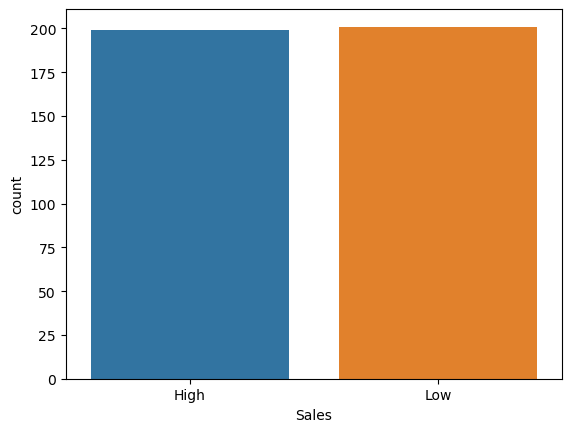

In [8]:
sns.countplot(data['Sales'])

<AxesSubplot:xlabel='ShelveLoc'>

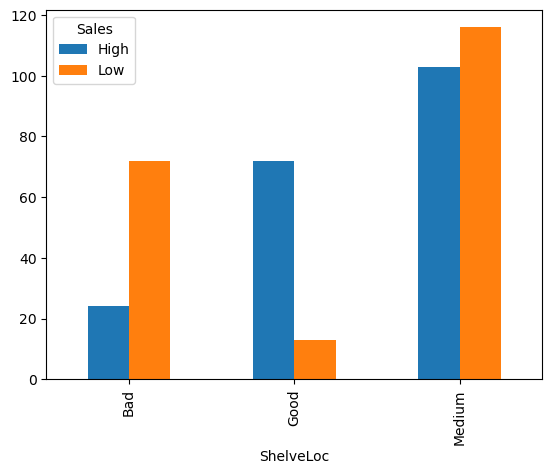

In [9]:
pd.crosstab(data['ShelveLoc'], data['Sales']).plot(kind = 'bar')

<AxesSubplot:xlabel='Urban'>

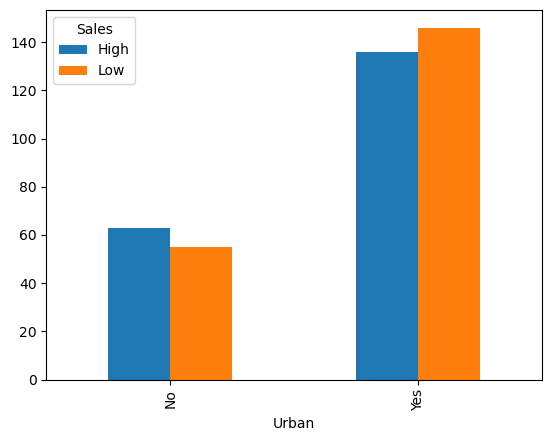

In [10]:
pd.crosstab(data['Urban'], data['Sales']).plot(kind = 'bar')

<AxesSubplot:xlabel='US'>

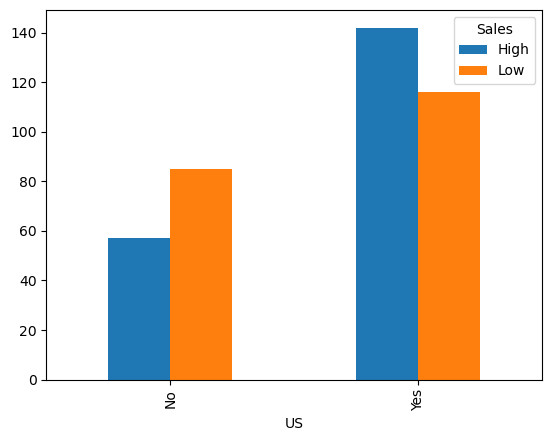

In [11]:
pd.crosstab(data['US'], data['Sales']).plot(kind = 'bar')

<AxesSubplot:xlabel='Education'>

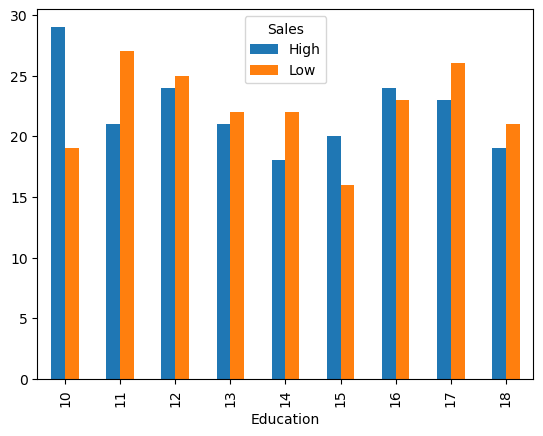

In [12]:
pd.crosstab(data['Education'], data['Sales']).plot(kind = 'bar')

##### Mapping

In [13]:
data['ShelveLoc'] = data['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})

In [14]:
data['Urban'] = data['Urban'].map({'No': 0, 'Yes': 1})

In [15]:
data['US'] = data['US'].map({'No': 0, 'Yes': 1})

In [16]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,2,65,10,1,1
2,High,113,35,10,269,80,1,59,12,1,1
3,Low,117,100,4,466,97,1,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0


In [17]:
features = data.drop('Sales', axis = 1)

In [18]:
Y = data['Sales']
Y.shape

(400,)

In [19]:
Y = Y.map({'Low': 0, 'High': 1})

##### Train-Test Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size = 0.2, random_state = 1)

### gini_model

In [21]:
gini_model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 2)
gini_model.fit(x_train, y_train)

RandomForestClassifier(random_state=2)

In [22]:
gini_pred = gini_model.predict(x_test)
gini_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [23]:
print(confusion_matrix(y_test, gini_pred))

[[32  8]
 [ 8 32]]


In [24]:
print(classification_report(y_test, gini_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        40
           1       0.80      0.80      0.80        40

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



### entropy_model

In [25]:
entropy_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 8)
entropy_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=8)

In [26]:
entropy_pred = entropy_model.predict(x_test)
entropy_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [27]:
print(confusion_matrix(y_test, entropy_pred))

[[34  6]
 [10 30]]


In [28]:
print(classification_report(y_test, entropy_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.83      0.75      0.79        40

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80

